In [1]:
# Mahipalsing - Hierarchical, K means clustering and DBSCAN of Crime data sets Assignment

# Hierarchical clustering

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Load data sets
crime = pd.read_csv("/Users/mayur/Desktop/Excelr Solution/Assignment-7(Cultering)/crime_data.csv")

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
crime.info()     # Data has clear

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


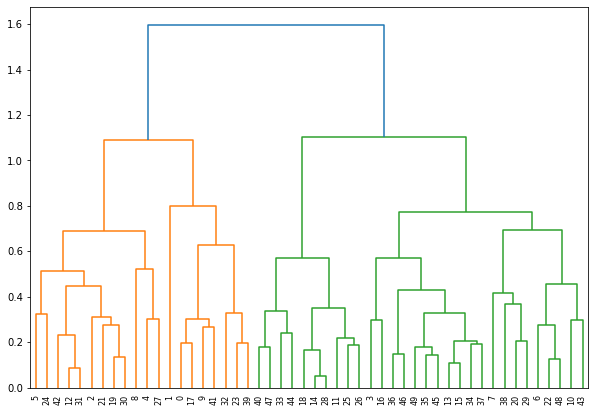

In [10]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(crime_norm,'complete'))

In [11]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hclusters

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [12]:
y=pd.DataFrame(hclusters.fit_predict(crime_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    20
3    12
2    10
0     8
Name: clustersid, dtype: int64

In [13]:
# Adding clusters to dataset
crime['clustersid']=hclusters.labels_
crime

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [14]:
crime.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


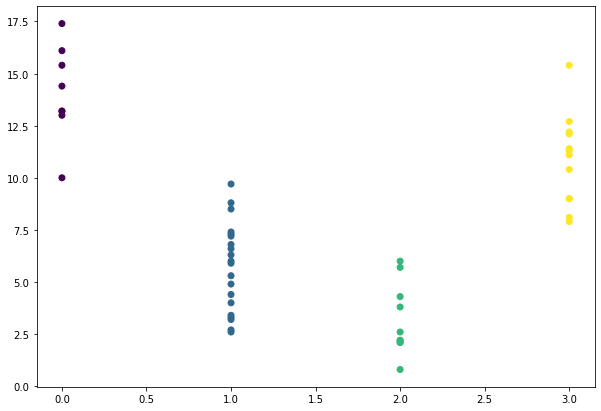

In [15]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clustersid'],crime['Murder'], c=hclusters.labels_) 

# K means clustering

In [16]:
# Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [27]:
# Load data sets
crime = pd.read_csv("/Users/mayur/Desktop/Excelr Solution/Assignment-7(Cultering)/crime_data.csv")

In [28]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [29]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime)

In [31]:
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [32]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters=4)
model.fit(crime_norm)
model.labels_                    # getting the labels of clusters assigned to each row 

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [33]:
md = pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime2['clusters'] = md          # creating a  new column and assigning it to new column 
crime2

,Murder,Assault,UrbanPop,Rape,clustersid,clusters
0,13.2,236,58,21.2,0,3
1,10.0,263,48,44.5,0,1
2,8.1,294,80,31.0,3,1
3,8.8,190,50,19.5,1,3
4,9.0,276,91,40.6,3,1
5,7.9,204,78,38.7,3,1
6,3.3,110,77,11.1,1,0
7,5.9,238,72,15.8,1,0
8,15.4,335,80,31.9,3,1
9,17.4,211,60,25.8,0,3


In [34]:
crime2.groupby(crime2.clusters).mean()

,Murder,Assault,UrbanPop,Rape,clustersid
clusters,,,,,
0,5.852941,141.176471,73.647059,19.335294,1.117647
1,10.966667,264.000000,76.500000,33.608333,2.750000
2,3.600000,78.538462,52.076923,12.176923,1.769231
3,13.937500,243.625000,53.750000,21.412500,0.125000


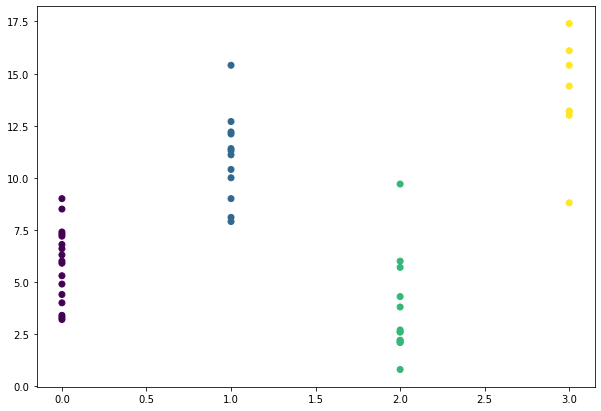

In [35]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clusters'],crime2['Murder'], c=model.labels_)

# DBSCAN

In [22]:
# Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [23]:
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [24]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [25]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
ml=pd.DataFrame(dbscan.labels_,columns=['cluster'])
pd.concat([crime_norm,ml],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0
